In [5]:
from smart_open import open
import pickle as pk
import pandas as pd
import wordcloud as wc
import gensim as gs
import gensim.corpora as cp
import pyLDAvis.gensim
import pyLDAvis

In [6]:
df_tk_pre = pk.load( open( "./data/pre_df_tk.p", "rb" ) )

In [3]:
df_tk_pre.head(5)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ptitle,pscore,pid,pbody,pcreated,comment,cauthor,ccreated,pcreated_date,ccreated_date,involved_teams
0,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[stop, sporting, winning, league, least, make,...",idek0k,1.613592e+09,2021-02-17 14:07:53,2021-02-17 15:07:27,Juventus vs Porto
1,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[dont, follow, liga, no, closely, portuguese, ...",kuzjaruge,1.613590e+09,2021-02-17 14:07:53,2021-02-17 14:27:25,Juventus vs Porto
2,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[go, porto, get, win, look, match, thread, pop...",TweakyWatson,1.613591e+09,2021-02-17 14:07:53,2021-02-17 14:36:02,Juventus vs Porto
3,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[shame, fan, allowed, stadium, think, would, l...",rabbitvinyl,1.613596e+09,2021-02-17 14:07:53,2021-02-17 16:04:36,Juventus vs Porto
4,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[juventusntus, take, easily, porto, fairly, de...",NunoxGames,1.613591e+09,2021-02-17 14:07:53,2021-02-17 14:41:04,Juventus vs Porto


# **Explore Word Cloud**

In [7]:
all_words = ''
for comment in df_tk_pre['comment']:
    all_words += ','.join(list(comment)) 
all_words

'stop,sporting,winning,league,least,make,country,proud,winning,old,ladydont,follow,liga,no,closely,portuguese,friend,want,give,u,quick,update,porto,form,special,player,lookgo,porto,get,win,look,match,thread,popcornshame,fan,allowed,stadium,think,would,lovely,see,reception,danilo,alex,sandro,return,ronaldo,fucking,love,playing,porto,fun,see,struggling,defense,try,contain,seems,like,ultimate,lethargic,midfield,battlejuventusntus,take,easily,porto,fairly,decent,team,ucl,theyre,quite,bad,season,there,supporter,made,estadio,dragão,hard,stadium,playoh,cuadrado,injured,suck,looking,forward,colombian,matchupmarega,masterclassmckennie,bentancur,rabiot,starting,might,troublesome,juventusntus,today,really,interesting,pirlo,take,game,rom,approach,playing,really,carefullyfucking,hope,bernardeschi,doesnt,start,dude,actual,terroristhappy,get,watch,goat,play,champion,league,footballdont,see,juventusntus,beating,team,big,number,moment,always,seem,struggle,creating,chance,ive,heard,porto,solid,defence,p

In [8]:
len(all_words)

909205

In [9]:
wordcloud = wc.WordCloud(background_color="white", max_words=100000, contour_width=3, contour_color='steelblue')

In [10]:
wordcloud.generate(all_words)

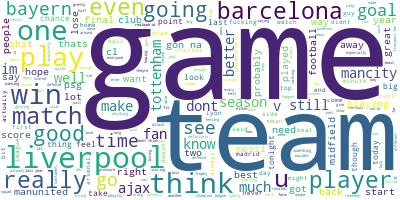

In [11]:
wordcloud.to_image()

# **Data Preparation**

In [12]:
all_words = []
for comment in df_tk_pre['comment']:
    all_words.append(comment)
list(all_words)

[['stop',
  'sporting',
  'winning',
  'league',
  'least',
  'make',
  'country',
  'proud',
  'winning',
  'old',
  'lady'],
 ['dont',
  'follow',
  'liga',
  'no',
  'closely',
  'portuguese',
  'friend',
  'want',
  'give',
  'u',
  'quick',
  'update',
  'porto',
  'form',
  'special',
  'player',
  'look'],
 ['go', 'porto', 'get', 'win', 'look', 'match', 'thread', 'popcorn'],
 ['shame',
  'fan',
  'allowed',
  'stadium',
  'think',
  'would',
  'lovely',
  'see',
  'reception',
  'danilo',
  'alex',
  'sandro',
  'return',
  'ronaldo',
  'fucking',
  'love',
  'playing',
  'porto',
  'fun',
  'see',
  'struggling',
  'defense',
  'try',
  'contain',
  'seems',
  'like',
  'ultimate',
  'lethargic',
  'midfield',
  'battle'],
 ['juventusntus',
  'take',
  'easily',
  'porto',
  'fairly',
  'decent',
  'team',
  'ucl',
  'theyre',
  'quite',
  'bad',
  'season',
  'there',
  'supporter',
  'made',
  'estadio',
  'dragão',
  'hard',
  'stadium',
  'play'],
 ['oh',
  'cuadrado',
  'i

In [13]:
# Create dictionary and corpus
word2num = cp.Dictionary(all_words)
texts = all_words
word2num

In [14]:
# Get term frequency
corpus = [word2num.doc2bow(text) for text in texts]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2)],
 [(10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(17, 1), (20, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(20, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(20, 1),
  (55, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)],
 [(87, 1), (88, 1)],

In [19]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.31397029848085395),
 (1, 0.4607179555673147),
 (2, 0.17826774928107036),
 (3, 0.22167555361091876),
 (4, 0.18826872818087606),
 (5, 0.25809282967650415),
 (6, 0.33201101237153957),
 (7, 0.35635507793887183),
 (8, 0.2665105763266219),
 (9, 0.44490112569340584)]


# **LDA Model**

In [16]:
n_topics = 10
lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
doc_lda = lda_model[corpus]

In [13]:
lda_model.print_topics()

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"game" + 0.010*"goal" + 0.008*"team" + 0.008*"liverpool" + 0.008*"play" + 0.008*"think" + 0.008*"one" + 0.007*"best" + 0.006*"season" + 0.006*"bayern"'),
 (1,
  '0.020*"win" + 0.011*"like" + 0.010*"dont" + 0.009*"liverpool" + 0.009*"would" + 0.008*"see" + 0.006*"go" + 0.006*"mate" + 0.006*"thats" + 0.006*"team"'),
 (2,
  '0.014*"game" + 0.010*"dont" + 0.010*"would" + 0.010*"think" + 0.009*"season" + 0.009*"last" + 0.009*"good" + 0.009*"fan" + 0.009*"liverpool" + 0.009*"mancity"'),
 (3,
  '0.013*"game" + 0.012*"team" + 0.010*"liverpool" + 0.010*"match" + 0.008*"win" + 0.008*"see" + 0.008*"u" + 0.007*"like" + 0.007*"get" + 0.006*"last"'),
 (4,
  '0.011*"game" + 0.011*"im" + 0.008*"team" + 0.007*"would" + 0.007*"league" + 0.006*"season" + 0.006*"dont" + 0.006*"start" + 0.006*"away" + 0.006*"http"'),
 (5,
  '0.009*"win" + 0.009*"would" + 0.008*"like" + 0.008*"game" + 0.008*"one" + 0.008*"play" + 0.008*"liverpool" + 0.008*"get" + 0.008*"right" + 0.008*"team"'),
 (6,
  '0.014*"

### LDA Model TF-IDF

In [25]:
lda_model_tfidf = gs.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=word2num, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    

Topic: 0 Word: 0.006*"like" + 0.005*"game" + 0.004*"liverpool" + 0.004*"win" + 0.004*"go" + 0.004*"would" + 0.004*"messi" + 0.004*"please" + 0.003*"one" + 0.003*"think"
Topic: 1 Word: 0.007*"good" + 0.005*"win" + 0.005*"team" + 0.005*"like" + 0.004*"game" + 0.004*"subscribe" + 0.004*"liverpool" + 0.004*"think" + 0.003*"u" + 0.003*"man"
Topic: 2 Word: 0.082*"deleted" + 0.004*"sure" + 0.004*"one" + 0.003*"game" + 0.003*"though" + 0.003*"time" + 0.003*"still" + 0.003*"team" + 0.003*"like" + 0.003*"ok"
Topic: 3 Word: 0.006*"win" + 0.005*"game" + 0.005*"barcelona" + 0.005*"fuck" + 0.005*"thanks" + 0.004*"liverpool" + 0.004*"think" + 0.004*"goal" + 0.004*"go" + 0.004*"nervous"
Topic: 4 Word: 0.008*"deleted" + 0.008*"yes" + 0.005*"hope" + 0.004*"well" + 0.004*"get" + 0.004*"thats" + 0.004*"match" + 0.003*"u" + 0.003*"game" + 0.003*"tottenham"
Topic: 5 Word: 0.007*"bayern" + 0.006*"goal" + 0.005*"yeah" + 0.004*"liverpool" + 0.004*"im" + 0.004*"win" + 0.004*"time" + 0.003*"one" + 0.003*"nice" +

# **Topic Analysis**

In [14]:
pyLDAvis.enable_notebook()

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, word2num)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.003200  0.009051       1        1  14.210470
6      0.013771  0.023277       2        1  12.650580
3      0.005385  0.007269       3        1  11.897066
0     -0.014570  0.008345       4        1  11.419424
8     -0.012913  0.022433       5        1  11.014825
9      0.018018 -0.004626       6        1   9.464443
5     -0.014165  0.003346       7        1   8.171621
1      0.085927 -0.017137       8        1   7.238418
4     -0.041919  0.036499       9        1   7.081168
7     -0.036333 -0.088457      10        1   6.851986, topic_info=           Term         Freq        Total Category  logprob  loglift
554     deleted   369.000000   369.000000  Default  30.0000  30.0000
32          win  1227.000000  1227.000000  Default  29.0000  29.0000
43         like  1052.000000  1052.000000  Default  28.0000  28.0000
557       final   519.000000   519.000000  Default  27.0000  27.0000
70         play   706.000000   706.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1504  tottenham    37.531065   427.523638  Topic10  -5.5672   0.2478
355        time    40.651195   690.678959  Topic10  -5.4873  -0.1520
259        even    38.473948   582.100591  Topic10  -5.5424  -0.0360
189   liverpool    39.811293  1234.222044  Topic10  -5.5082  -0.7534
178      bayern    36.861221   489.525972  Topic10  -5.5852   0.0944

[863 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
11711     10  0.742288  aaaaaamiiiiiiiiiis
8128       1  0.696050              accent
8128       5  0.174013              accent
8128       7  0.087006              accent
11226     10  0.742286          acceptance
...      ...       ...                 ...
5078       7  0.139288                yous
2972       1  0.758928                   z
2972       4  0.151786                   z
9945       3  0.166594                zijn
9945       9  0.666377                zijn

[2503 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 4, 1, 9, 10, 6, 2, 5, 8])

In [18]:
pyLDAvis.save_html(LDAvis_prepared,'./html/lda_n10.html')

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic Analysis Tf-IDF

In [27]:
LDAvis_prepared_tf = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, word2num)
LDAvis_prepared_tf
pyLDAvis.save_html(LDAvis_prepared_tf,'./html/ldatf-idf_n10.html')